# Movie Revenue Prediction
***

### Import Packages
***

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis
***

In [2]:
# Load dataset
movie_ds = pd.read_csv("../Movie_Prediction_Analysis/movie_revenue_predictions.csv")
movie_ds.head()

,title,tagline,revenue,budget,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
2,Spectre,A Plan No One Escapes,880674609,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/15,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released
3,The Dark Knight Rises,The Legend Ends,1084939099,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/12,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
4,John Carter,"Lost in our world, found in another.",284139100,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/12,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released


In [3]:
movie_ds.shape

(4803, 16)

In [4]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
title                   4803 non-null object
tagline                 3959 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
overview                4800 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 600.5+ KB


### Check for null values in any column

In [5]:
movie_ds.isnull().any()

title                   False
tagline                  True
revenue                 False
budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
overview                 True
production_companies    False
production_countries    False
release_date             True
runtime                  True
spoken_languages        False
status                  False
dtype: bool

### Drop Features

As some of the columns/features are irrelevant and have a lot of missing values as well and would not contribute to our analysis, therefore we can drop those columns to focus of relevant features for prediction.

In [6]:
movie_ds.drop(['tagline','homepage','overview'],axis=1,inplace=True)

In [7]:
movie_ds.isnull().any()

title                   False
revenue                 False
budget                  False
genres                  False
id                      False
keywords                False
original_language       False
production_companies    False
production_countries    False
release_date             True
runtime                  True
spoken_languages        False
status                  False
dtype: bool

### Creating a correlation matrix for the columns

,revenue,budget,id,runtime
revenue,1.000000,0.730823,-0.050425,0.251093
budget,0.730823,1.000000,-0.089377,0.269851
id,-0.050425,-0.089377,1.000000,-0.153536
runtime,0.251093,0.269851,-0.153536,1.000000


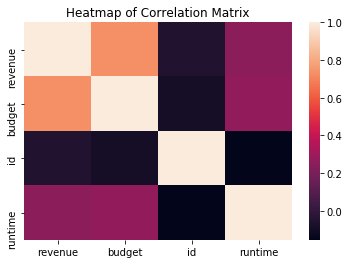

<Figure size 1440x720 with 0 Axes>

In [8]:
 # Create a correlation matrix.
corr = movie_ds.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

plt.figure(figsize=(20,10))

corr

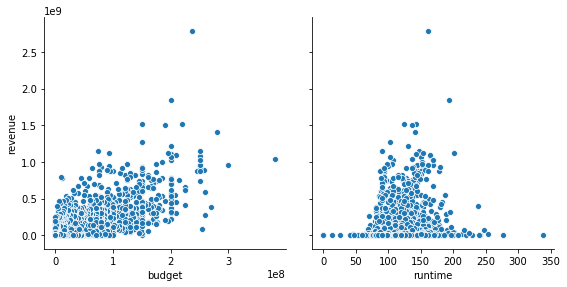

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(movie_ds, x_vars=['budget', 'runtime'], y_vars='revenue', height=4, aspect=1)